# TITANIC CLASSIFICATION

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
titanic_train = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')

In [4]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_train.shape

(891, 12)

In [6]:
titanic_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

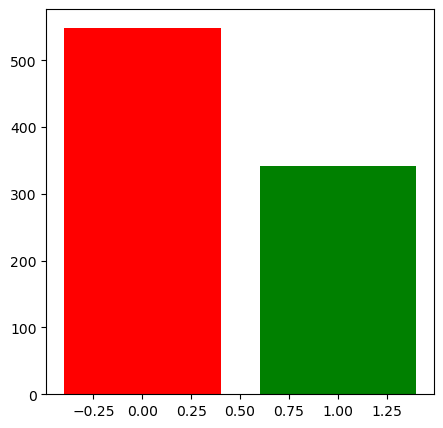

In [7]:
plt.figure(figsize = (5 , 5))
plt.bar(list(titanic_train['Survived'].value_counts().keys()), list(titanic_train['Survived'].value_counts()), color=["r","g"])
plt.show()

In [8]:
titanic_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

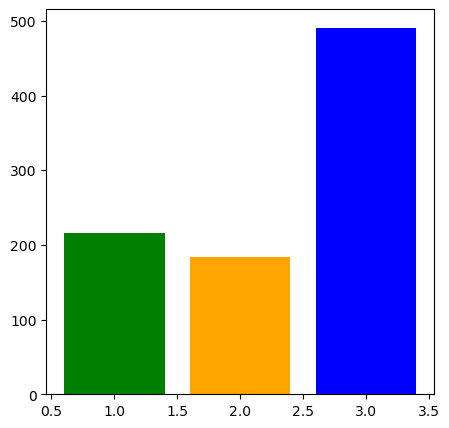

In [9]:
plt.figure(figsize = (5 , 5))
plt.bar(list(titanic_train['Pclass'].value_counts().keys()), list(titanic_train['Pclass'].value_counts()), color=["blue","green","orange"])
plt.show()

In [10]:
titanic_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

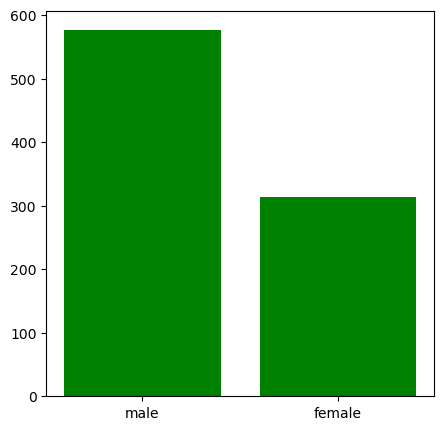

In [11]:
plt.figure(figsize = (5 , 5))
plt.bar(list(titanic_train['Sex'].value_counts().keys()) , list(titanic_train['Sex'].value_counts()) , color = "green")
plt.show()

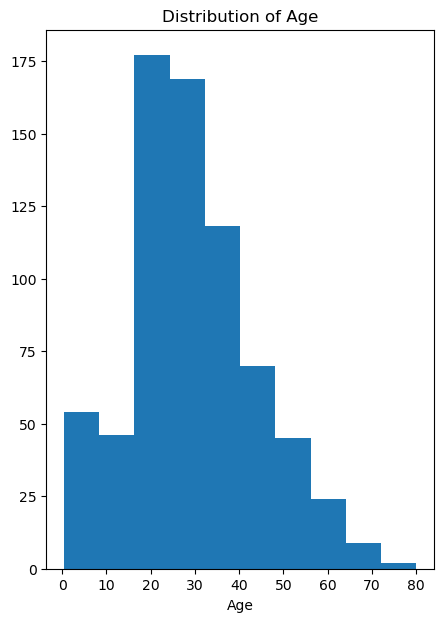

In [12]:
plt.figure(figsize = (5 , 7))
plt.hist(titanic_train['Age'])
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.show()

In [13]:
sum(titanic_train['Survived'].isnull())

0

In [14]:
sum(titanic_train['Age'].isnull())

177

In [15]:
titanic_train = titanic_train.dropna()

****BUILDING THE MODEL****

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve, auc

In [38]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
X = titanic_train[features]
y = titanic_train['Survived']

In [39]:
X = pd.get_dummies(X, columns=['Sex'], drop_first=True)

In [40]:
X = X.dropna()
y = y[X.index]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [43]:
y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

In [44]:
precision_gb = precision_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

In [45]:
y_probs_gb = gb_model.predict_proba(X_test)[:, 1]
roc_auc_gb = roc_auc_score(y_test, y_probs_gb)

In [46]:
fpr, tpr, _ = roc_curve(y_test, y_probs_gb)
roc_auc_curve = auc(fpr, tpr)

In [47]:
print(f"Gradient Boosting Test Accuracy: {accuracy_gb:.2%}")
print(f"Precision: {precision_gb:.2f}")
print(f"F1 Score: {f1_gb:.2f}")
print(f"ROC AUC: {roc_auc_gb:.2f}")

Gradient Boosting Test Accuracy: 86.49%
Precision: 0.88
F1 Score: 0.89
ROC AUC: 0.90


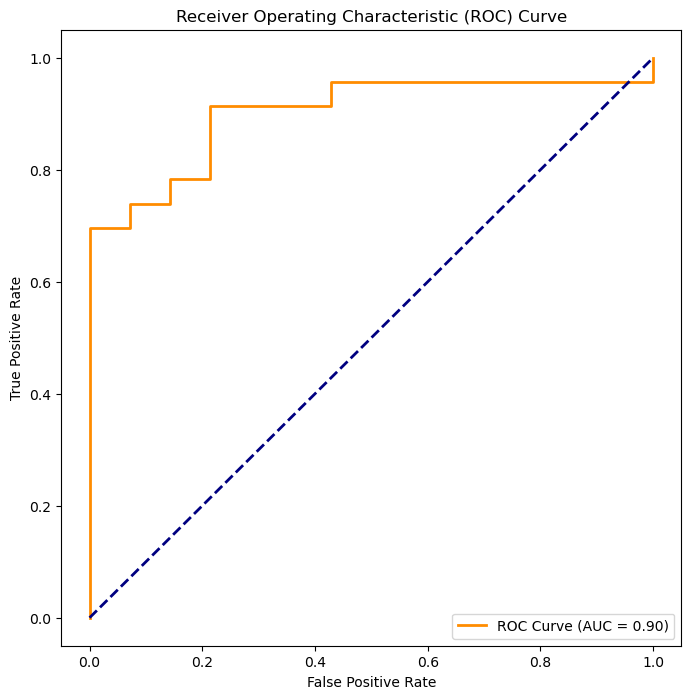

In [48]:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_curve:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()